In [67]:
# Dependencies 
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json
import requests
from citipy import citipy 
import random
import time as time 

In [68]:
# Import api_key 
from config import api_key

In [69]:
#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude:
    # Latitude in degrees is -90 and +90 
    # Longitude is in the range -180 and +180 

#Creating a dataframe to display the values
cities_df = pd.DataFrame(columns =
                            ['City',
                             'Latitudes',
                             'Longitudes',
                            ])
# Holding the variables 
lat = []
lng = []
cities = []

#Creating loops to go through random lat and lng and assigning cities based on coordinates picked
    #2000 was chosen in order to ensure that atleast 500 would be unique (non-repeat) cities
for x in range(0,2000):
    lat.append(random.uniform(-90,90))
    lng.append(random.uniform(-180,180))
cities_df['Latitudes']  = lat
cities_df['Longitudes'] = lng

for index, row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitudes"],row["Longitudes"])
    cities.append(city.city_name)
cities_df['City'] = cities

#Displaying the top five 
cities_df.head()

,City,Latitudes,Longitudes
0,kayerkan,73.843233,87.141556
1,taolanaro,-45.960918,54.736105
2,cape town,-82.907199,-14.759134
3,rikitea,-82.020721,-133.366234
4,yellowknife,67.690858,-107.898782


In [70]:
new_cities_df = cities_df.drop_duplicates("City", keep = "first")
new_cities_df =  new_cities_df.dropna(axis= 1, how = 'all')
len(new_cities_df)

754

In [71]:
# Creating empty lists to hold the information
temp = []
wind_speed = []
cloudiness = []
humidity = []

# Calling the API from the website
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

counter = 0 

for index, row in new_cities_df.iterrows():
    try: 
        target_url = base_url + row["City"] + "&units=imperial" + "&appid="+ api_key
        time.sleep(1)
        response = requests.get(target_url).json()
        temp.append(response["main"]["temp"])
        wind_speed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
    except: 
        new_cities_df.drop(index, inplace = True)
        pass 
    
    print("We are on city number " + str(counter))
    counter = counter + 1 
    print("This is the city: " + row['City'])
    print(target_url)  

We are on city number 0
This is the city: kayerkan
http://api.openweathermap.org/data/2.5/weather?q=kayerkan&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 1
This is the city: taolanaro
http://api.openweathermap.org/data/2.5/weather?q=taolanaro&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 2
This is the city: cape town
http://api.openweathermap.org/data/2.5/weather?q=cape town&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 3
This is the city: rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 4
This is the city: yellowknife
http://api.openweathermap.org/data/2.5/weather?q=yellowknife&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 5
This is the city: byron bay
http://api.openweathermap.org/data/2.5/weather?q=byron bay&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on ci

We are on city number 50
This is the city: hermanus
http://api.openweathermap.org/data/2.5/weather?q=hermanus&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 51
This is the city: thompson
http://api.openweathermap.org/data/2.5/weather?q=thompson&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 52
This is the city: arraial do cabo
http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 53
This is the city: ampanihy
http://api.openweathermap.org/data/2.5/weather?q=ampanihy&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 54
This is the city: flinders
http://api.openweathermap.org/data/2.5/weather?q=flinders&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 55
This is the city: ambulu
http://api.openweathermap.org/data/2.5/weather?q=ambulu&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are

We are on city number 101
This is the city: chuy
http://api.openweathermap.org/data/2.5/weather?q=chuy&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 102
This is the city: eten
http://api.openweathermap.org/data/2.5/weather?q=eten&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 103
This is the city: barentsburg
http://api.openweathermap.org/data/2.5/weather?q=barentsburg&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 104
This is the city: bredasdorp
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 105
This is the city: falealupo
http://api.openweathermap.org/data/2.5/weather?q=falealupo&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 106
This is the city: yumen
http://api.openweathermap.org/data/2.5/weather?q=yumen&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city numbe

We are on city number 151
This is the city: svetlogorsk
http://api.openweathermap.org/data/2.5/weather?q=svetlogorsk&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 152
This is the city: bengkulu
http://api.openweathermap.org/data/2.5/weather?q=bengkulu&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 153
This is the city: port hedland
http://api.openweathermap.org/data/2.5/weather?q=port hedland&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 154
This is the city: altamira
http://api.openweathermap.org/data/2.5/weather?q=altamira&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 155
This is the city: barrow
http://api.openweathermap.org/data/2.5/weather?q=barrow&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 156
This is the city: nouadhibou
http://api.openweathermap.org/data/2.5/weather?q=nouadhibou&units=imperial&appid=288bd40bdc806164c2b347c489a98

We are on city number 201
This is the city: nanortalik
http://api.openweathermap.org/data/2.5/weather?q=nanortalik&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 202
This is the city: faanui
http://api.openweathermap.org/data/2.5/weather?q=faanui&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 203
This is the city: severodvinsk
http://api.openweathermap.org/data/2.5/weather?q=severodvinsk&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 204
This is the city: vicuna
http://api.openweathermap.org/data/2.5/weather?q=vicuna&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 205
This is the city: tiznit
http://api.openweathermap.org/data/2.5/weather?q=tiznit&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 206
This is the city: tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We a

We are on city number 251
This is the city: wagar
http://api.openweathermap.org/data/2.5/weather?q=wagar&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 252
This is the city: pisco
http://api.openweathermap.org/data/2.5/weather?q=pisco&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 253
This is the city: sarangani
http://api.openweathermap.org/data/2.5/weather?q=sarangani&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 254
This is the city: mount gambier
http://api.openweathermap.org/data/2.5/weather?q=mount gambier&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 255
This is the city: ahome
http://api.openweathermap.org/data/2.5/weather?q=ahome&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 256
This is the city: leningradskiy
http://api.openweathermap.org/data/2.5/weather?q=leningradskiy&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are

We are on city number 301
This is the city: gat
http://api.openweathermap.org/data/2.5/weather?q=gat&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 302
This is the city: mondovi
http://api.openweathermap.org/data/2.5/weather?q=mondovi&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 303
This is the city: seoul
http://api.openweathermap.org/data/2.5/weather?q=seoul&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 304
This is the city: severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?q=severo-kurilsk&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 305
This is the city: aykhal
http://api.openweathermap.org/data/2.5/weather?q=aykhal&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 306
This is the city: ballina
http://api.openweathermap.org/data/2.5/weather?q=ballina&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 

We are on city number 352
This is the city: saint-augustin
http://api.openweathermap.org/data/2.5/weather?q=saint-augustin&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 353
This is the city: vanimo
http://api.openweathermap.org/data/2.5/weather?q=vanimo&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 354
This is the city: sabang
http://api.openweathermap.org/data/2.5/weather?q=sabang&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 355
This is the city: saint-paul
http://api.openweathermap.org/data/2.5/weather?q=saint-paul&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 356
This is the city: gambela
http://api.openweathermap.org/data/2.5/weather?q=gambela&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 357
This is the city: lagoa
http://api.openweathermap.org/data/2.5/weather?q=lagoa&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on 

We are on city number 402
This is the city: luderitz
http://api.openweathermap.org/data/2.5/weather?q=luderitz&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 403
This is the city: chhagalnaiya
http://api.openweathermap.org/data/2.5/weather?q=chhagalnaiya&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 404
This is the city: olafsvik
http://api.openweathermap.org/data/2.5/weather?q=olafsvik&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 405
This is the city: klaksvik
http://api.openweathermap.org/data/2.5/weather?q=klaksvik&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 406
This is the city: yar-sale
http://api.openweathermap.org/data/2.5/weather?q=yar-sale&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 407
This is the city: vicam
http://api.openweathermap.org/data/2.5/weather?q=vicam&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are o

We are on city number 452
This is the city: bonavista
http://api.openweathermap.org/data/2.5/weather?q=bonavista&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 453
This is the city: nanga eboko
http://api.openweathermap.org/data/2.5/weather?q=nanga eboko&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 454
This is the city: araguatins
http://api.openweathermap.org/data/2.5/weather?q=araguatins&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 455
This is the city: satitoa
http://api.openweathermap.org/data/2.5/weather?q=satitoa&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 456
This is the city: nizhniy tsasuchey
http://api.openweathermap.org/data/2.5/weather?q=nizhniy tsasuchey&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 457
This is the city: maloshuyka
http://api.openweathermap.org/data/2.5/weather?q=maloshuyka&units=imperial&appid=288bd40bdc8

We are on city number 501
This is the city: tidore
http://api.openweathermap.org/data/2.5/weather?q=tidore&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 502
This is the city: palabuhanratu
http://api.openweathermap.org/data/2.5/weather?q=palabuhanratu&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 503
This is the city: purpe
http://api.openweathermap.org/data/2.5/weather?q=purpe&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 504
This is the city: eureka
http://api.openweathermap.org/data/2.5/weather?q=eureka&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 505
This is the city: matara
http://api.openweathermap.org/data/2.5/weather?q=matara&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 506
This is the city: san quintin
http://api.openweathermap.org/data/2.5/weather?q=san quintin&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on ci

We are on city number 551
This is the city: hermosillo
http://api.openweathermap.org/data/2.5/weather?q=hermosillo&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 552
This is the city: abu kamal
http://api.openweathermap.org/data/2.5/weather?q=abu kamal&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 553
This is the city: darhan
http://api.openweathermap.org/data/2.5/weather?q=darhan&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 554
This is the city: gigmoto
http://api.openweathermap.org/data/2.5/weather?q=gigmoto&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 555
This is the city: ramanuj ganj
http://api.openweathermap.org/data/2.5/weather?q=ramanuj ganj&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 556
This is the city: kloulklubed
http://api.openweathermap.org/data/2.5/weather?q=kloulklubed&units=imperial&appid=288bd40bdc806164c2b347c489a98

We are on city number 601
This is the city: kushiro
http://api.openweathermap.org/data/2.5/weather?q=kushiro&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 602
This is the city: kem
http://api.openweathermap.org/data/2.5/weather?q=kem&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 603
This is the city: loandjili
http://api.openweathermap.org/data/2.5/weather?q=loandjili&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 604
This is the city: stornoway
http://api.openweathermap.org/data/2.5/weather?q=stornoway&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 605
This is the city: tateyama
http://api.openweathermap.org/data/2.5/weather?q=tateyama&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 606
This is the city: grandview
http://api.openweathermap.org/data/2.5/weather?q=grandview&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city n

We are on city number 651
This is the city: sassandra
http://api.openweathermap.org/data/2.5/weather?q=sassandra&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 652
This is the city: jaisinghnagar
http://api.openweathermap.org/data/2.5/weather?q=jaisinghnagar&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 653
This is the city: ayan
http://api.openweathermap.org/data/2.5/weather?q=ayan&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 654
This is the city: rorvik
http://api.openweathermap.org/data/2.5/weather?q=rorvik&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 655
This is the city: ambovombe
http://api.openweathermap.org/data/2.5/weather?q=ambovombe&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 656
This is the city: namtsy
http://api.openweathermap.org/data/2.5/weather?q=namtsy&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on ci

We are on city number 701
This is the city: kropotkin
http://api.openweathermap.org/data/2.5/weather?q=kropotkin&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 702
This is the city: yazman
http://api.openweathermap.org/data/2.5/weather?q=yazman&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 703
This is the city: chapais
http://api.openweathermap.org/data/2.5/weather?q=chapais&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 704
This is the city: petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?q=petropavlovsk-kamchatskiy&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 705
This is the city: khonuu
http://api.openweathermap.org/data/2.5/weather?q=khonuu&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 706
This is the city: westport
http://api.openweathermap.org/data/2.5/weather?q=westport&units=imperial&appid=288bd40bdc806164c

We are on city number 751
This is the city: palmas bellas
http://api.openweathermap.org/data/2.5/weather?q=palmas bellas&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 752
This is the city: porto novo
http://api.openweathermap.org/data/2.5/weather?q=porto novo&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 753
This is the city: mananara
http://api.openweathermap.org/data/2.5/weather?q=mananara&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6


In [74]:
new_cities_df["Temperature"] = temp 
new_cities_df["Wind_Speed"] = wind_speed
new_cities_df["Cloudiness"] = cloudiness
new_cities_df["Humidity"] = humidity
new_cities_df.head()

,City,Latitudes,Longitudes,Temperature,Wind_Speed,Cloudiness,Humidity
0,kayerkan,73.843233,87.141556,-17.87,2.93,24,52
2,cape town,-82.907199,-14.759134,66.20,14.99,0,72
3,rikitea,-82.020721,-133.366234,78.35,4.94,32,100
4,yellowknife,67.690858,-107.898782,6.80,11.41,20,46
5,byron bay,-28.545205,158.500609,80.60,18.34,40,57


In [76]:
#Saving the data output to a csv file 
output_data_file = "WeatherPy_DataOutput.csv"
new_cities_df.to_csv(output_data_file, index_label="City Number")

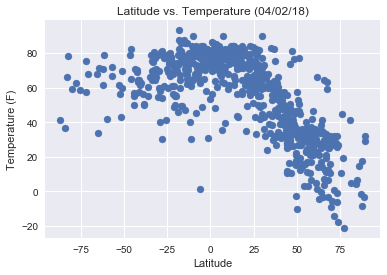

In [77]:
#Latitude Vs Temperature Scatter Plot details and saving the figure to png
plt.scatter(new_cities_df["Latitudes"],new_cities_df["Temperature"],marker ="o")
plt.title(("Latitude vs. Temperature (%s)" % time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
sns.set()
plt.savefig("Latitude_vs_Temperature.png")
plt.show()

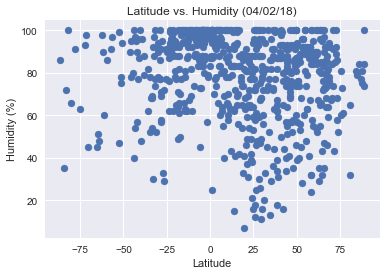

In [78]:
#Humidity Vs. Latitude Scatter Plot details and saving the figure to png
plt.scatter(new_cities_df["Latitudes"],new_cities_df["Humidity"],marker ="o")
plt.title(("Latitude vs. Humidity (%s)" % time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
sns.set()
plt.savefig("Latitude_vs_Humiditiy.png")
plt.show()

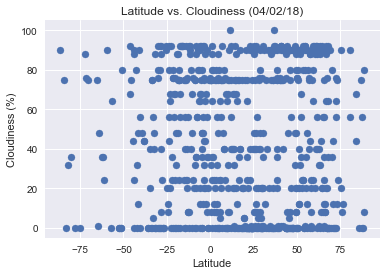

In [79]:
#Cloudiness Vs. Latitude Scatter Plot details and saving the figure to png
plt.scatter(new_cities_df["Latitudes"],new_cities_df["Cloudiness"],marker ="o")
plt.title(("Latitude vs. Cloudiness (%s)" % time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
sns.set()
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

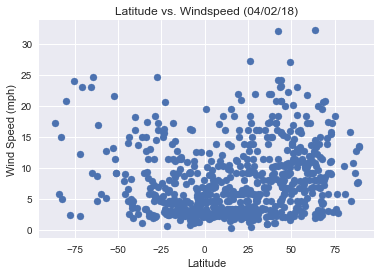

In [80]:
#Wind Speed Vs. Latitude Scatter Plot details and saving the figure to png
plt.scatter(new_cities_df["Latitudes"], new_cities_df["Wind_Speed"],marker ="o")
plt.title(("Latitude vs. Windspeed (%s)" % time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
sns.set()
plt.savefig("Latitude_vs_WindSpeed.png")
plt.show()